# Unit 4 Lesson 2: Decision Trees

## Human Activity Recognition Using Smartphones Data Set 

The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data. 

https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones

### Import the usual suspects

In [141]:
import numpy as np
import pandas as pd
import re
from sklearn.ensemble import RandomForestClassifier

### Features: "A 561-feature vector with time and frequency domain variables."

In [198]:
features = list(open("UCI HAR Dataset/features.txt", "r")) # 561
len(set(features)) # confirm they're all there

561

## Clean up the data

* Identify and fix the inclusion of ( ) in column names.
* Identify and remove duplicate column names.
* Identify and fix the inclusion of ‘-’ in column names.
* Identify and fix extra ) in some column names.
* Identify and fix inclusion of multiple ‘,’ in column names.
* Identify and fix column names containing “BodyBody”
* Drop 'Body' and 'Mag' from column names.
* Map 'mean' and 'std' to 'Mean' and 'STD'

In [143]:
features = [re.sub(r"[-(),\n]", "", l)
            .split()[1:][0]
            .replace("Body", "")
            .replace("Mag", "")
            .replace("mean", "Mean")
            .replace("std", "STD") for l in features]
print(len(set(features)))
print(features[0:10])

469
['tAccMeanX', 'tAccMeanY', 'tAccMeanZ', 'tAccSTDX', 'tAccSTDY', 'tAccSTDZ', 'tAccmadX', 'tAccmadY', 'tAccmadZ', 'tAccmaxX']


## Our input, 7,352 rows, each consisting of 561 vectors, space-separated

In [144]:
X = open('UCI HAR Dataset/train/X_train.txt').readlines()

In [145]:
df = pd.DataFrame([[float(n) for n in row.strip().split()] for row in X], columns = features)

In [146]:
df.head()

,tAccMeanX,tAccMeanY,tAccMeanZ,tAccSTDX,tAccSTDY,tAccSTDZ,tAccmadX,tAccmadY,tAccmadZ,tAccmaxX,...,fGyroJerkMeanFreq,fGyroJerkskewness,fGyroJerkkurtosis,angletAccMeangravity,angletAccJerkMeangravityMean,angletGyroMeangravityMean,angletGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [167]:
print(len(df), len(df.columns))

7352 564


In [148]:
type(df["tAccMeanX"][0])

numpy.float64

## Our targets: 7,352 rows, each labeled 1, 2, 3, 4, 5, or 6, corresponding to: 
### WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING

In [149]:
y_train = [int(n.strip('\n')) for n in open('UCI HAR Dataset/train/y_train.txt').readlines()]

In [150]:
df["y"] = y_train

## The identies of our 30 subjects, labeled 1 - 30

In [151]:
subject_train = [int(n.strip('\n')) for n in open('UCI HAR Dataset/train/subject_train.txt').readlines()]
df["subject_train"] = subject_train

### Activity labels: "Make activity a categorical variable"

In [168]:
activity = [a[2:].strip('\n') for a in open("UCI HAR Dataset/activity_labels.txt", "r")]
activity

['WALKING',
 'WALKING_UPSTAIRS',
 'WALKING_DOWNSTAIRS',
 'SITTING',
 'STANDING',
 'LAYING']

### Note: There are duplicate column names: Is this going to be a problem?

In [153]:
len(set(df.columns))

471

### Plot a histogram of Body Acceleration Magnitude (i.e. histogram of all 6 activities) to see how each variable does as a predictor of static versus dynamic activities.

In [180]:
df.columns[-5:]

Index(['angleYgravityMean', 'angleZgravityMean', 'y', 'subject_train',
       'segment'],
      dtype='object')

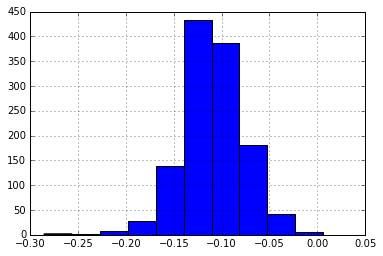

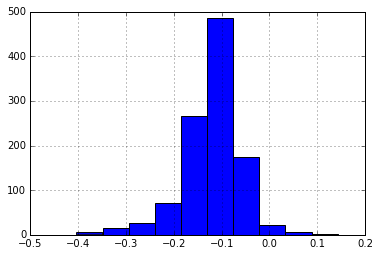

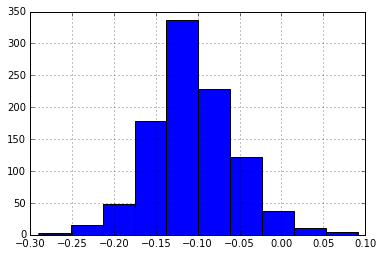

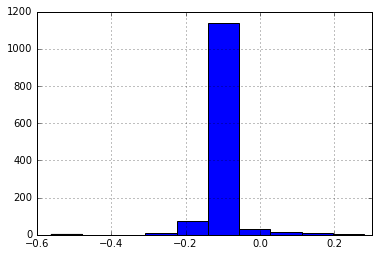

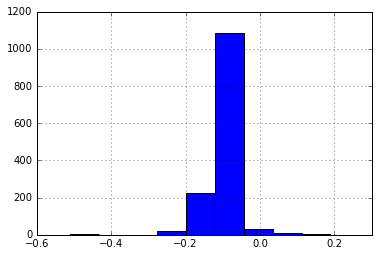

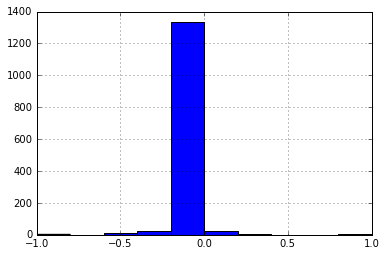

In [191]:
%matplotlib inline
import matplotlib.pyplot as plt


for act in range(1, 7):
    temp = df[df['y'] == act] # activities
    plt.figure()
    p = temp['tAccMeanZ'].hist()
    plt.show()

### Reference: Plotting histograms (earlier lessons)

In [ ]:
# # One way to do it (DOESN'T WORK!)
# plt.hist(x, histtype='bar')
# plt.show()

# # Another (WORKS)
# plt.figure()
# p = loansData['FICO.Score'].hist()
# plt.show()

### Split the data into training, test, and validation sets.

In [154]:
# Prepare to divide the dataset into test, train (lifted from sklearn Iris example)
df['segment'] = np.random.uniform(0, 1, len(df))

train_data = df[df['segment'] < .34]
val_data = df[(df['segment'] > .33) & (df['segment'] < .67)]
test_data = df[df['segment'] > .67]

### Fit a random forest classifier with 500 estimators to your training set.

In [155]:
# Adapting the Iris example: http://blog.yhat.com/posts/random-forests-in-python.html
features = df.columns[:500]
clf = RandomForestClassifier(n_jobs=2)
y, _ = pd.factorize(train_data['y'])
y = [n+1 for n in y] # Offset 
clf.fit(train_data[features], y)

preds_test = clf.predict(test_data[features])

pd.crosstab(test_data['y'], preds_test, rownames=['actual'], colnames=['preds'])

preds,1,2,3,4,5,6
actual,,,,,,
1,0,0,0,380,3,2
2,0,0,0,7,8,318
3,0,0,0,13,296,12
4,59,385,0,1,0,0
5,426,17,0,0,0,1
6,0,0,517,0,0,1


In [156]:
preds_val = clf.predict(val_data[features])
pd.crosstab(val_data['y'], preds_val, rownames=['actual'], colnames=['preds'])

preds,1,2,3,4,5,6
actual,,,,,,
1,0,0,0,414,5,2
2,0,0,0,11,14,369
3,0,0,0,14,322,7
4,50,382,1,0,0,0
5,469,21,0,0,0,0
6,0,0,450,1,0,1


### Rank the features by their importance scores. What are the top 10 important features? What is the 10th feature's importance score?

### What is your model's mean accuracy score on the validation and test sets?

In [196]:
# https://www.quora.com/How-do-you-measure-the-accuracy-score-for-each-class-when-testing-classifier-in-sklearn?share=1
from sklearn.metrics import accuracy_score

accuracy_score(val_data['y'], preds_val)

0.00039478878799842083

### What is your model's precision and recall score on the test set?

In [160]:
#sklearn.metrics.precision_recall_fscore_support(y_true, y_pred, 
# beta=1.0, labels=None, pos_label=1, average=None, warn_for=('precision', 'recall', 'f-score'), sample_weight=None)

from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(val_data['y'], preds_val, average='weighted')

(0.00047082990019864439, 0.00039478878799842083, 0.00042946939151693425, None)

# Unit 4 Lesson 2 Project 4: Full Random Forest Analysis

Being able to read and interpret the column names won't always help you out of that scenario, so in this lesson we're going to do something different: we're going to name the columns x0...xn. Then we're going to use a black box approach to random forests, i.e. one where we don't really understand the variables and the model but with which we can do useful things anyway. Then we will see what we get as the top 10 variables and compare with our approach in the previous lesson. This will allow us to compare and contrast the two methods--one where we used a lot of domain knowledge, and one where we use a 'black box' approach.

### Change the column names to [x0...xn], but keep the last two columns in the dataset named 'subject' and 'activity'.

In [161]:
columns_renamed = ['x'+str(n) for n in range(len(df.columns)-2)]
df.columns

Index(['tAccMeanX', 'tAccMeanY', 'tAccMeanZ', 'tAccSTDX', 'tAccSTDY',
       'tAccSTDZ', 'tAccmadX', 'tAccmadY', 'tAccmadZ', 'tAccmaxX',
       ...
       'angletAccMeangravity', 'angletAccJerkMeangravityMean',
       'angletGyroMeangravityMean', 'angletGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean', 'y',
       'subject_train', 'segment'],
      dtype='object', length=564)

### Split the data into training, test, and validation sets as follows:
* Train your model on subjects >= 27
* Test your model on subjects <= 6
* Validate your model on subjects >= 21 and < 27

In [164]:
# Prepare to divide the dataset into test, train (lifted from sklearn Iris example)
train_data_subject = df[df['subject_train'] >= 27]
test_data_subject = df[df['subject_train'] <= 6]
val_data_subject = df[(df['subject_train'] >= 21) & (df['subject_train'] < 27)]

In [165]:
features = df.columns[:500]
clf = RandomForestClassifier(n_jobs=2)
y, _ = pd.factorize(train_data_subject['y'])
y = [n+1 for n in y] # Offset 
clf.fit(train_data_subject[features], y)

preds_test = clf.predict(test_data_subject[features])

pd.crosstab(test_data_subject['y'], preds_test, rownames=['actual'], colnames=['preds'])

preds,1,2,3,4,5,6
actual,,,,,,
1,0,0,0,241,16,9
2,0,0,0,10,64,136
3,0,0,0,4,184,5
4,62,130,5,0,0,1
5,146,79,2,0,0,0
6,1,5,211,1,1,2


### Fit a random forest classifier with 50 estimators to your training set. What is the `oob_score_`? How does it compare to our previous model's oob score?

In [166]:
features = df.columns[:50]
clf = RandomForestClassifier(n_jobs=2)
y, _ = pd.factorize(train_data_subject['y'])
y = [n+1 for n in y] # Offset 
clf.fit(train_data_subject[features], y)

preds_test = clf.predict(test_data_subject[features])


### Rank the features by their importance scores. What are the top 10 important features? What is the 10th feature's importance score? How does it compare to the 10th feature's importance score in the last lesson?

Since we are using more features (all of the features, actually) we can expect the importance measure to be spread out more, so individual importance scores are going to be smaller.

### What is your model's mean accuracy score on the validation and test sets?

### Plot your model's confusion matrix.

### What is your model's precision, recall, and F1 score on the test set?

As we (might have) expected, this "black box" random forest performs better than our domain-knowledge driven random forest. But, we have no idea what these top 10 features are.

In [197]:
#Reference: copy-pasted from above
#precision_recall_fscore_support(val_data['y'], preds_val, average='weighted')

### See if you can map the top 10 features back to their original column names. (Hint: the number in our new column names should be the column's position.)
* tGravityAcc-mean()-X
* tGravityAcc-mad()-Z
* tGravityAcc-max()-X
* tGravityAcc-max()-Z
* tGravityAcc-min()-X
* tGravityAcc-sma()
* tGravityAcc-energy()-X
* fBodyAcc-bandsEnergy()-25,48.2
* angle(tBodyGyroJerkMean,gravityMean)
* angle(X,gravityMean)

### Iris example for reference:

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
df['species'] = pd.Factor(iris.target, iris.target_names)

train, test = df[df['is_train']==True], df[df['is_train']==False]

features = df.columns[:4]
clf = RandomForestClassifier(n_jobs=2)
y, _ = pd.factorize(train['species'])
clf.fit(train[features], y)

preds = iris.target_names[clf.predict(test[features])]
pd.crosstab(test['species'], preds, rownames=['actual'], colnames=['preds'])